<a href="https://colab.research.google.com/github/J-Guevara/Twitch-Engagement/blob/main/Capstone_3_Viewership_and_followers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://drive.google.com/uc?id=1wUwK1VEfDDM1dpjk6SrTlKtCium0cTjM">
<br>

## The Twitch gamer ecosystem 

Twitch has been an oasis for gamers for over 10 years now! Creating an iconic gaming community and building a long term fanbase for gamers who want to showcase their skills while entertaining others.
##    
This sparked my interest as a gamer and as someone who believes in the future of internet economics. Twitch has created many internet figures that later on went on to become influencers, musicians and even actors. I wanted to find out how many hours gamers are streaming on a yearly basis in order to create this fanbase by looking at their acquired views and followers during that year's time frame. 
##  
Eventually pushing me to take a deeper look at the streaming analytics and see if the results we find can be applied to other social media streaming platforms.




# Enough streaming, let's wrangle the data!

I will be using a dataset that holds the top 1000 streamers. The data set includes streaming time, viewership, spoken language by the streamer and followers count in a year timeframe
<br>

The data set can be found here: https://www.kaggle.com/aayushmishra1512/twitchdata
<br>


In [ ]:
#Mounting my google drive in order to have access to our data
from google.colab import drive
drive.mount('/content/gdrive')

#Let's import the modules we will be using for this analysis. Datatime imported for easy minutes to hours conversion
import pandas as pd
import numpy as np 
import statistics as stats
from scipy import stats, optimize, interpolate
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.stats.stats import pearsonr

# suppress warnings (warnings do not prevent the code from executing)
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(10, 12)})

pd.set_option('display.float_format', lambda x: '{:,.0f}'.format(x)) #set the right formating for our followers, and views gained for ease of read

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Now that we've imported our necessary modules we can take a look at the columns and have a better idea what we can and can't use:

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/twitchdata-update.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


As previously mentioned we will be taking a look at the top 1000 streamers, hence the 1000 rows in our dataset. Now let’s take a look at the first 15 rows to get an idea of the kind of data we will be using:

In [ ]:
df.head(15)

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English
5,Asmongold,3668799075,82260,263720,42414,1563438,554201,61715781,True,False,English
6,NICKMERCS,3360675195,136275,115633,24181,4074287,1089824,46084211,True,False,English
7,Fextralife,3301867485,147885,68795,18985,508816,425468,670137548,True,False,English
8,loltyler1,2928356940,122490,89387,22381,3530767,951730,51349926,True,False,English
9,Anomaly,2865429915,92880,125408,12377,2607076,1532689,36350662,True,False,English


## Let's press pause for a second 

There’s a lot of information in this database. Let’s narrow it down to what we will be using, which in this case will be the Channel, stream time, views gained, followers gained and language

In [ ]:
#dropping the other unnecesary columns.
n_df = df[['Channel', 'Stream time(minutes)', 'Views gained', 'Followers gained', 'Language']]
n_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Stream time(minutes)  1000 non-null   int64 
 2   Views gained          1000 non-null   int64 
 3   Followers gained      1000 non-null   int64 
 4   Language              1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [ ]:
#taking a look at the dimmension of the data
print('-- shape of the data--')
n_df.shape

-- shape of the data--


(1000, 5)

Now let's check for nulls in the data

In [ ]:
#check for nulls
n_df.isnull().sum()

Channel                 0
Stream time(minutes)    0
Views gained            0
Followers gained        0
Language                0
dtype: int64

In [ ]:
#run a safety check to ensure there's no nulls
null_rows = n_df[n_df.isnull().any(axis=1)]

print(f"There are {len(null_rows)} rows with a null out of {len(n_df)} rows in the dataset")

There are 0 rows with a null out of 1000 rows in the dataset


In this case the data has no nulls in the categories selected. We can now run some statistics and get some idea at the trends we can expect to see 

# Don't be *mean* while streaming!

Let's take a look at some descriptive statistics of our data:

In [ ]:
n_df.describe() #descriptive statistics for our numeric values (counts being the total rows)

,Stream time(minutes),Views gained,Followers gained
count,"1,000","1,000","1,000"
mean,"120,515","11,668,166","205,519"
std,"85,376","24,905,722","339,914"
min,"3,465","175,788","-15,772"
25%,"73,759","3,880,602","43,758"
50%,"108,240","6,456,324","98,352"
75%,"141,844","12,196,762","236,131"
max,"521,445","670,137,548","3,966,525"


The average user is streaming about **120k minutes** or about **2,000 hours** a year with an average **11.6 billion** views gained and **200k followers** acquired. 

Talk about an audience!

## Say it in a universal language!

Let’s take a closer look at the most spoken languages amongst the top streamers in the platform

In [ ]:
n_df['Language'].value_counts() #countinng the most spoken languages amongst all 1000 streamers

English       485
Korean         77
Russian        74
Spanish        68
French         66
Portuguese     61
German         49
Chinese        30
Turkish        22
Italian        17
Polish         12
Thai           11
Japanese       10
Czech           6
Arabic          5
Hungarian       2
Other           1
Slovak          1
Greek           1
Finnish         1
Swedish         1
Name: Language, dtype: int64

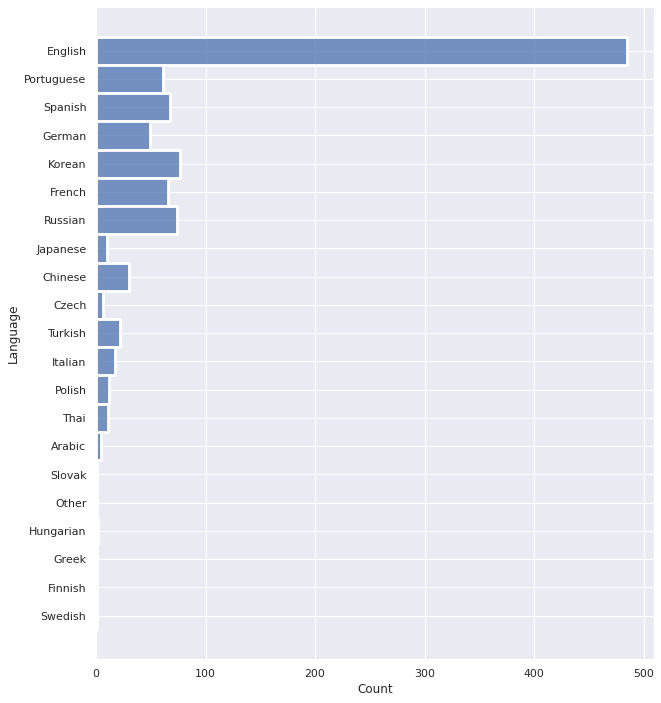

In [ ]:
his_df=sns.histplot(data=n_df, y='Language') #taking a more visual approach to the data

The data shows that most streamers speak English, Korean, Russian and Spanish. Although there’s less than 10 streamers that speak Czech, Arabic , Hungarian,  Swedish, Finnish, Slovak, Greek, etc. It’s interesting to see such niche markets make it to the top 1000

# Don't forget to like and subscribe

Let’s analyze the stream time of our Twitch users 

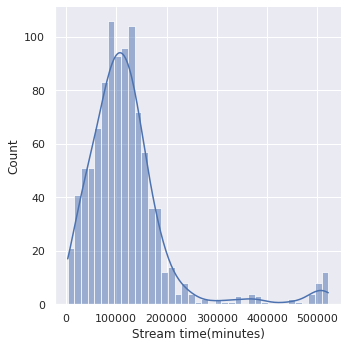

In [ ]:
n_df['Stream time(minutes)']
s_df=sns.displot(n_df['Stream time(minutes)'], kde= True)

Most users streaming fall in the 1k-1.6K hours of stream time (converted from minutes) Now let’s look at the results for their followers gained and views gained

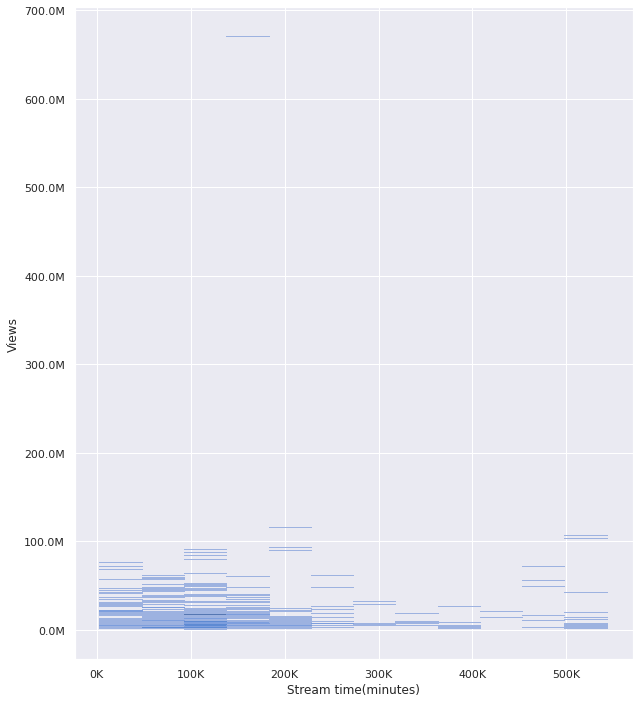

In [ ]:
views_df = pd.Series(n_df['Views gained'], name = "Views")
v_df=sns.histplot(data=n_df, x='Stream time(minutes)', y=views_df,binwidth=45000)
v_df.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K')) #formatting the x axis to proper units
v_df.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.1f}'.format(y/1000000) + 'M')) #formatting the y axis to proper increment intervals as views are per million

Now let's take a look at the followers gained:

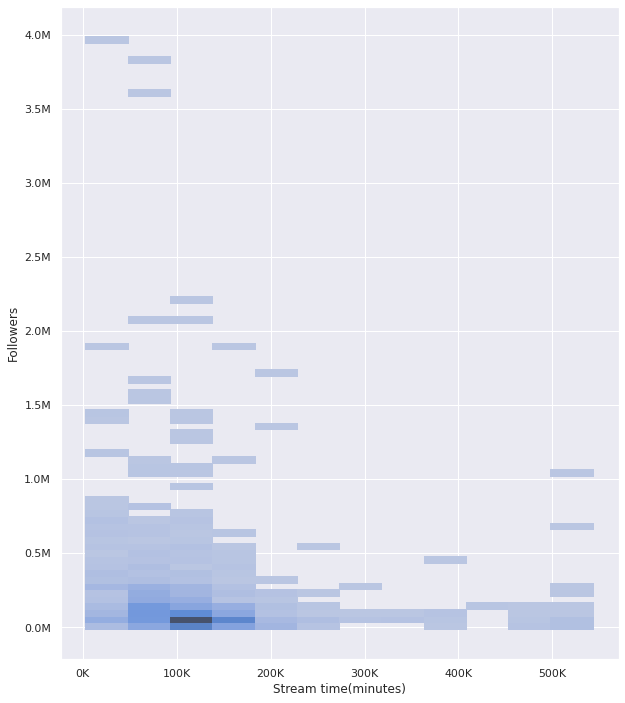

In [ ]:
follows_df = pd.Series(n_df['Followers gained'], name = "Followers")
f_df=sns.histplot(data=n_df, x='Stream time(minutes)', y=follows_df, binwidth=45000)
#f_df=sns.displot(x=follows_df, y=s_df, binwidth=45000, kde = True) #possible alternative

f_df.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K')) #formatting the x axis 
f_df.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.1f}'.format(y/1000000) + 'M')) #formatting the y axis

It looks like we’re seeing a trend where more streaming time can potentially result in more views and followers. However, the sweet spot for most of our users is about .5-1 Million new followers with about 50M-100M a year! That’s a lot of engagement for just one year 

## Plotting your greatest win

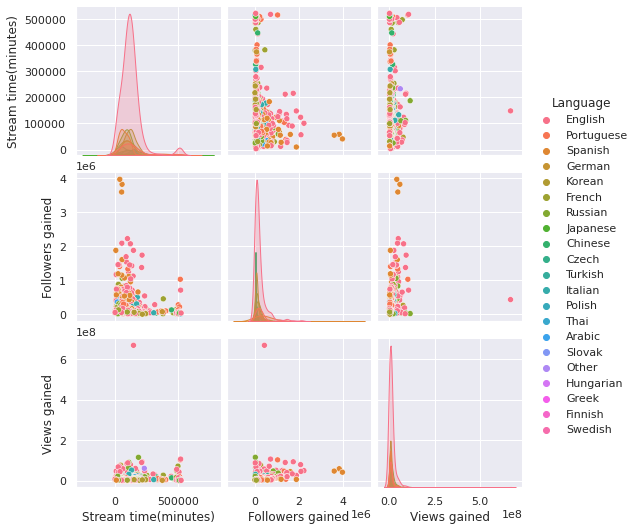

In [ ]:
free_for_all = sns.pairplot(n_df, vars = ["Stream time(minutes)", "Followers gained", "Views gained"], hue="Language")

We can see how the platform is mainly used by English speakers and there seems to be some correlation between stream time and viewers but not much correlation between stream time and followers. Let’s build our hypothesis and run our correlation test!

# The final boss!

After looking at the data, we can now build two hypotheses and test it to make sure we can confidently find a correlation between our chosen data.

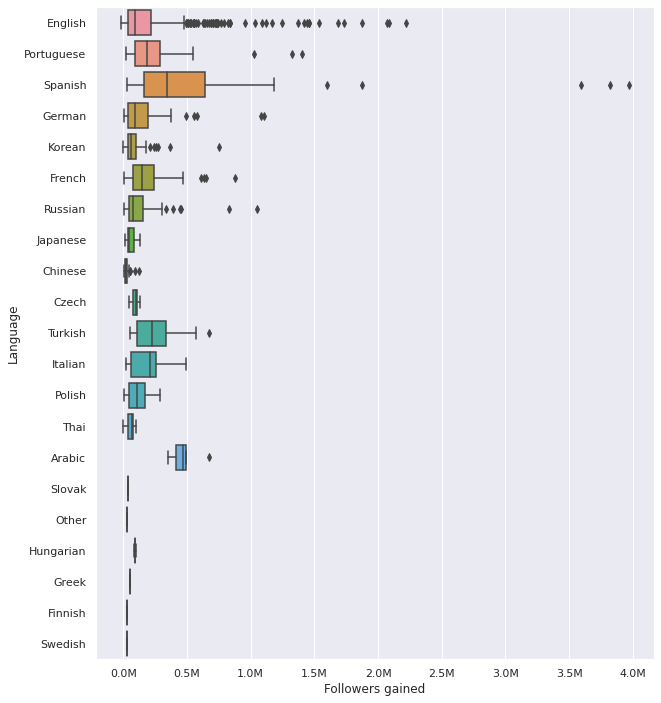

In [ ]:
r_df=sns.boxplot(y=n_df['Language'], x=n_df['Followers gained'])
r_df.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.1f}'.format(y/1000000) + 'M'))

Taking a look at the boxplot we see the outliers more visible, but within the same range. Since there’s more English speaking users our data is more refined. Let’s have a look in a scatterplot form and finish it off with our hypothesis.

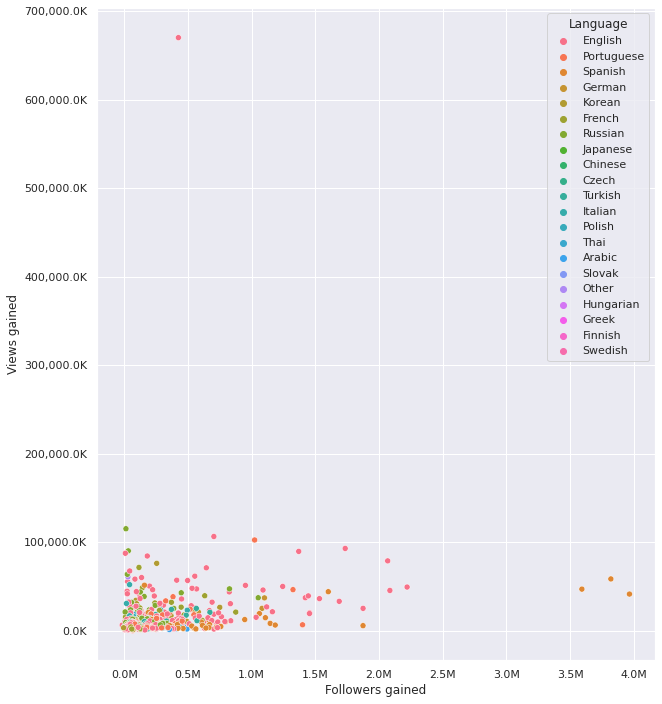

In [ ]:
sc_df=sns.scatterplot(x='Followers gained', y="Views gained", hue='Language', data=n_df)
sc_df.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1000000) + 'M')) 
sc_df.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.1f}'.format(y/1000) + 'K')) 


The scatterplot shows that viewerships can result in followers gained. Usually at a constant number. Let’s run a pearsonr test on both of our hypotheses.

# Rewind 

Based on our data we can come up with 2 hypotheses:


*   **Ho:** There’s no statistically significant correlation between followers gains and stream time. The more you stream the doesnt mean the more followers you get
*   **Ha:** There's a statistically significant correlation between stream time and views gained. The more content you stream the more views you will received based on the consistent audience 



## Ultra combo finish

We now use the Pearson Correlation coefficient test test to find the correlation coeffiecient and p-value. Just like with t-tests, you use the p-value to determine whether you reject Ho or failed to reject Ho. If you reject Ho, you will also provide an interpretation for the correlation coefficient, which is the strength of linear correlation

In [ ]:
#stats.ttest_ind(n_df['Stream time(minutes)'], n_df['Views gained']) - Alternative
#print(f'With a coeffieicient of {a:.3f} There is not a statiscally significant linear relationship between Stream time and Followers. The relationship is negative witha p-value of {b} we reject the null')

#testing the correlation between Stream time and Followers gained to reject the Ho Hypothesis 
stats.pearsonr(n_df['Stream time(minutes)'], n_df['Followers gained'])

(-0.15816478527011052, 4.981386544982613e-07)

Our p-value is 4.981386544982613e-07, which is much smaller than our alpha of 0.05. Thus we reject the null that there is no statistically significant linear correlation. The correlation coefficient of -0.158 tells us there is a weak negative correlation.


In [ ]:
#checking correlation between stream time and views gained
stats.pearsonr(n_df['Stream time(minutes)'], n_df['Views gained'])

(0.06437002583021895, 0.041838408011208916)

With a coefficient of 0.064 There is statiscally significant linear relationship between Stream time and Views Gained. The relationship is positive witha p-value of 0.041838408011208916 less than .05. Positive Correlation


#End Credits

**First the positive!**

After analyzing our data, we can assume with 95% confidence that users who ended up in the top 1000 users in the Twitch platform had to stream over 1.6k hours a year in order to gain the viewership they gained. Every user that stayed in that ranged saw an average of 11 million views gained

**Streaming is not all!**

After finding the correlation between the Views gained and Stream time, we then tried to find a correlation between streaming time and followers gained. As it makes sense that those who are viewing you would become long term fans.

However, the data shows that followers gained are not correlated to how long you stream. We would have to look into other variables as well as analyze the kind of content and how we are enageging with our audience.

# Other Market Applications and Social Media Usage

We can use this analysis and apply to other social media platforms that focus on fan engagement. We can also use the viewership traffic and monetize it with ads or content related to the channel they’re watching. And for the followers, find out what it is that makes them subscribe. By applying this to other sites we can potentially sell this as a consulting tool for our clients.